In [ ]:
pip install gdown


In [1]:
import gdown
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://drive.google.com/uc?id=1aEndr6HzAEaXRAG3Qp3LpB2M0Zcv_Ygx'

output = 'DF3.csv'
gdown.download(url, output, quiet=False)

# Cargar csv
df = pd.read_csv(output)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,FECHA_CORTE,FECHA_AFILIADOS_SIS,CODIGO_ANONIMIZADO,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_PRIMER_DX,...,UBIGEO_ULT_ATE,DEPARTAMENTO_ULT_ATE,PROVINCIA_ULT_ATE,DISTRITO_ULT_ATE,NIVEL_ULT_ATE,row_num,FECHA_RENAL,RENAL_CRONICA,DIAS_PRIMER_DX,EDAD_DIABETES_DX
0,20240426,20230930,7F740D5B18F768D9B9BD5310BDAB80A2B6BD033CD299DB...,43,200704,PIURA,TALARA,LOBITOS,FEMENINO,20211018,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,41
1,20240426,20230930,0D565A0D766FA8340243CE1EB5D0F338C348F9AE54D337...,58,200704,PIURA,TALARA,LOBITOS,MASCULINO,20230325,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,58
2,20240426,20230930,B4F32AE30791FD95C1AB7BF3EA68E0D2F448268B5BEB2F...,61,200704,PIURA,TALARA,LOBITOS,MASCULINO,20220428,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,60
3,20240426,20230930,4AECAFC07E815A79DC1FC904A09D4F230AA80E86E32A01...,59,200704,PIURA,TALARA,LOBITOS,FEMENINO,20200930,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,56
4,20240426,20230930,31E82140F7F2ED19A444990C39F89857CCE2BF166A0C52...,70,200704,PIURA,TALARA,LOBITOS,FEMENINO,20180825,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625951,20240426,20230930,DC44531D077870961FA2019E9425A36EC9F99F6BF63781...,60,130303,LA LIBERTAD,BOLÍVAR,CONDORMARCA,MASCULINO,20230303,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,60
625952,20240426,20230930,AC2D553A50513647F5AAC51FF1A922304144EA1A8E294F...,74,130303,LA LIBERTAD,BOLÍVAR,CONDORMARCA,MASCULINO,20210616,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,72
625953,20240426,20230930,5B62FFB1653A0D57D2D931E9AA132776A28292257717B2...,40,130303,LA LIBERTAD,BOLÍVAR,CONDORMARCA,FEMENINO,20230518,...,130303.0,LA LIBERTAD,BOLÍVAR,CONDORMARCA,1.0,1,NaN,NaN,NaN,40
625954,20240426,20230930,058702E57CB63B38B99056F73E91285CA6B2E39207D5D6...,66,130303,LA LIBERTAD,BOLÍVAR,CONDORMARCA,FEMENINO,20230518,...,130303.0,LA LIBERTAD,BOLÍVAR,CONDORMARCA,1.0,1,NaN,NaN,NaN,66


In [ ]:
len(df['CODIGO_ANONIMIZADO'].unique())


625956

In [ ]:
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'], format='%Y%m%d')
df['FECHA_PRIMER_DX'] = pd.to_datetime(df['FECHA_PRIMER_DX'], format='%Y%m%d')
df['DURACION_DIABETES'] = (df['FECHA_CORTE'] - df['FECHA_PRIMER_DX']).dt.days

In [ ]:
df['FRECUENCIA_ATENCIONES'] = df['CANT_ATENCIONES']/df['DURACION_DIABETES']

In [ ]:
df['FRECUENCI_HOSP'] = df['CANT_ATENCIONES_HOSP']/df['DURACION_DIABETES']

In [ ]:
df.columns

Index(['FECHA_CORTE', 'FECHA_AFILIADOS_SIS', 'CODIGO_ANONIMIZADO', 'EDAD',
       'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'SEXO',
       'FECHA_PRIMER_DX', 'TIPO_DIABETES', 'CON_DX_OBESIDAD',
       'CON_DX_HIPERTENSION', 'CON_DX_SALUDMENTAL', 'CANT_ATENCIONES',
       'VALOR_NETO', 'CANT_ATENCIONES_HOSP', 'VALOR_NETO_HOSP', 'DIAS_HOSP',
       'UBIGEO_ULT_ATE', 'DEPARTAMENTO_ULT_ATE', 'PROVINCIA_ULT_ATE',
       'DISTRITO_ULT_ATE', 'NIVEL_ULT_ATE', 'row_num', 'FECHA_RENAL',
       'RENAL_CRONICA', 'DIAS_PRIMER_DX', 'EDAD_DIABETES_DX',
       'DURACION_DIABETES', 'FRECUENCIA_ATENCIONES', 'FRECUENCI_HOSP'],
      dtype='object')

In [ ]:
df = df[[ 'EDAD', 'SEXO', 'CON_DX_OBESIDAD',
       'CON_DX_HIPERTENSION', 'CON_DX_SALUDMENTAL', 'CANT_ATENCIONES',
       'CANT_ATENCIONES_HOSP',  'DIAS_HOSP',
        'NIVEL_ULT_ATE', 'RENAL_CRONICA', 'DIAS_PRIMER_DX', 'EDAD_DIABETES_DX', ]]

In [ ]:
df

,EDAD,SEXO,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,CANT_ATENCIONES_HOSP,DIAS_HOSP,NIVEL_ULT_ATE,RENAL_CRONICA,DIAS_PRIMER_DX,EDAD_DIABETES_DX
0,43,FEMENINO,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,41
1,58,MASCULINO,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,58
2,61,MASCULINO,NaN,SI,NaN,0,0,0,NaN,NaN,NaN,60
3,59,FEMENINO,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,56
4,70,FEMENINO,SI,SI,NaN,0,0,0,NaN,NaN,NaN,65
...,...,...,...,...,...,...,...,...,...,...,...,...
625951,60,MASCULINO,SI,SI,NaN,0,0,0,NaN,NaN,NaN,60
625952,74,MASCULINO,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,72
625953,40,FEMENINO,NaN,NaN,NaN,1,0,0,1.0,NaN,NaN,40
625954,66,FEMENINO,SI,SI,NaN,1,0,0,1.0,NaN,NaN,66


In [ ]:
df.isnull().sum()

,0
EDAD,0
SEXO,0
CON_DX_OBESIDAD,227383
CON_DX_HIPERTENSION,388186
CON_DX_SALUDMENTAL,486184
CANT_ATENCIONES,0
CANT_ATENCIONES_HOSP,0
DIAS_HOSP,0
NIVEL_ULT_ATE,442311
RENAL_CRONICA,608841


In [ ]:
#elimnar filas con null en EDAD
df = df.dropna(subset=['EDAD'])
df

,EDAD,SEXO,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,CANT_ATENCIONES_HOSP,DIAS_HOSP,NIVEL_ULT_ATE,RENAL_CRONICA,DIAS_PRIMER_DX,EDAD_DIABETES_DX
0,43,FEMENINO,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,41
1,58,MASCULINO,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,58
2,61,MASCULINO,NaN,SI,NaN,0,0,0,NaN,NaN,NaN,60
3,59,FEMENINO,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,56
4,70,FEMENINO,SI,SI,NaN,0,0,0,NaN,NaN,NaN,65
...,...,...,...,...,...,...,...,...,...,...,...,...
625951,60,MASCULINO,SI,SI,NaN,0,0,0,NaN,NaN,NaN,60
625952,74,MASCULINO,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,72
625953,40,FEMENINO,NaN,NaN,NaN,1,0,0,1.0,NaN,NaN,40
625954,66,FEMENINO,SI,SI,NaN,1,0,0,1.0,NaN,NaN,66


In [ ]:
df.isnull().sum()

,0
EDAD,0
SEXO,0
CON_DX_OBESIDAD,227383
CON_DX_HIPERTENSION,388186
CON_DX_SALUDMENTAL,486184
CANT_ATENCIONES,0
CANT_ATENCIONES_HOSP,0
DIAS_HOSP,0
NIVEL_ULT_ATE,442311
RENAL_CRONICA,608841


In [ ]:
# Reemplazar nan con 0
df = df.fillna(0)
df

,EDAD,SEXO,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,CANT_ATENCIONES_HOSP,DIAS_HOSP,NIVEL_ULT_ATE,RENAL_CRONICA,DIAS_PRIMER_DX,EDAD_DIABETES_DX
0,43,FEMENINO,0,0,0,0,0,0,0.0,0.0,0.0,41
1,58,MASCULINO,0,0,0,0,0,0,0.0,0.0,0.0,58
2,61,MASCULINO,0,SI,0,0,0,0,0.0,0.0,0.0,60
3,59,FEMENINO,0,0,0,0,0,0,0.0,0.0,0.0,56
4,70,FEMENINO,SI,SI,0,0,0,0,0.0,0.0,0.0,65
...,...,...,...,...,...,...,...,...,...,...,...,...
625951,60,MASCULINO,SI,SI,0,0,0,0,0.0,0.0,0.0,60
625952,74,MASCULINO,0,0,0,0,0,0,0.0,0.0,0.0,72
625953,40,FEMENINO,0,0,0,1,0,0,1.0,0.0,0.0,40
625954,66,FEMENINO,SI,SI,0,1,0,0,1.0,0.0,0.0,66


In [ ]:
# Reemplazar SI con 1
df = df.replace('SI', 1)
df

,EDAD,SEXO,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,CANT_ATENCIONES_HOSP,DIAS_HOSP,NIVEL_ULT_ATE,RENAL_CRONICA,DIAS_PRIMER_DX,EDAD_DIABETES_DX
0,43,FEMENINO,0,0,0,0,0,0,0.0,0.0,0.0,41
1,58,MASCULINO,0,0,0,0,0,0,0.0,0.0,0.0,58
2,61,MASCULINO,0,1,0,0,0,0,0.0,0.0,0.0,60
3,59,FEMENINO,0,0,0,0,0,0,0.0,0.0,0.0,56
4,70,FEMENINO,1,1,0,0,0,0,0.0,0.0,0.0,65
...,...,...,...,...,...,...,...,...,...,...,...,...
625951,60,MASCULINO,1,1,0,0,0,0,0.0,0.0,0.0,60
625952,74,MASCULINO,0,0,0,0,0,0,0.0,0.0,0.0,72
625953,40,FEMENINO,0,0,0,1,0,0,1.0,0.0,0.0,40
625954,66,FEMENINO,1,1,0,1,0,0,1.0,0.0,0.0,66


In [ ]:
df.isnull().sum()

,0
EDAD,0
SEXO,0
CON_DX_OBESIDAD,0
CON_DX_HIPERTENSION,0
CON_DX_SALUDMENTAL,0
CANT_ATENCIONES,0
CANT_ATENCIONES_HOSP,0
DIAS_HOSP,0
NIVEL_ULT_ATE,0
RENAL_CRONICA,0


In [ ]:
#contar unicos en RENAL_CRONICA
df['RENAL_CRONICA'].value_counts()

,count
RENAL_CRONICA,
0.0,608841
1.0,17115


In [ ]:
clase_mayoritaria = df[df['RENAL_CRONICA'] == 0.0]
clase_minoritaria = df[df['RENAL_CRONICA'] == 1.0]

clase_mayoritaria_submuestreada = clase_mayoritaria.sample(n=len(clase_minoritaria), random_state=0)

df_balanceado = pd.concat([clase_mayoritaria_submuestreada, clase_minoritaria])

df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanceado['RENAL_CRONICA'].value_counts()

,count
RENAL_CRONICA,
0.0,17115
1.0,17115


In [ ]:
df = df_balanceado

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34230 entries, 0 to 34229
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EDAD                  34230 non-null  int64  
 1   SEXO                  34230 non-null  object 
 2   CON_DX_OBESIDAD       34230 non-null  int64  
 3   CON_DX_HIPERTENSION   34230 non-null  int64  
 4   CON_DX_SALUDMENTAL    34230 non-null  int64  
 5   CANT_ATENCIONES       34230 non-null  int64  
 6   CANT_ATENCIONES_HOSP  34230 non-null  int64  
 7   DIAS_HOSP             34230 non-null  int64  
 8   NIVEL_ULT_ATE         34230 non-null  float64
 9   RENAL_CRONICA         34230 non-null  float64
 10  DIAS_PRIMER_DX        34230 non-null  float64
 11  EDAD_DIABETES_DX      34230 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 3.1+ MB


**DURACIÓN DE DIABETES**
FECHA_CORTE - FECHA_PRIMER_DX

**FRECUENCIAS**
 (CANT_ATENCIONES / DURACION_DIABETES)
 (CANT_ATENCIONES_HOSP / DURACION_DIABETES)

In [ ]:
df.columns

Index(['EDAD', 'SEXO', 'CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION',
       'CON_DX_SALUDMENTAL', 'CANT_ATENCIONES', 'CANT_ATENCIONES_HOSP',
       'DIAS_HOSP', 'NIVEL_ULT_ATE', 'RENAL_CRONICA', 'DIAS_PRIMER_DX',
       'EDAD_DIABETES_DX'],
      dtype='object')

In [ ]:
x = df[['SEXO', 'CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION',
       'CON_DX_SALUDMENTAL', 'CANT_ATENCIONES', 'CANT_ATENCIONES_HOSP',
       'DIAS_HOSP', 'NIVEL_ULT_ATE',
       'EDAD_DIABETES_DX']]
y = df['RENAL_CRONICA']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train

,SEXO,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,CANT_ATENCIONES_HOSP,DIAS_HOSP,NIVEL_ULT_ATE,EDAD_DIABETES_DX
20871,FEMENINO,1,1,0,0,0,0,0.0,54
11931,FEMENINO,1,1,1,0,0,0,0.0,57
25511,FEMENINO,1,1,1,2,0,0,3.0,65
26967,FEMENINO,1,1,0,1,0,0,3.0,77
11269,FEMENINO,1,0,0,2,0,0,2.0,60
...,...,...,...,...,...,...,...,...,...
13861,FEMENINO,1,1,1,1,0,0,3.0,37
33678,FEMENINO,1,1,0,1,0,0,1.0,68
24315,FEMENINO,0,1,0,2,0,0,2.0,53
24688,FEMENINO,1,1,0,2,0,0,2.0,81


In [ ]:
# USAR pd.get_dummies con SEXO
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [ ]:
x_train

,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,CANT_ATENCIONES_HOSP,DIAS_HOSP,NIVEL_ULT_ATE,EDAD_DIABETES_DX,SEXO_FEMENINO,SEXO_MASCULINO
20871,1,1,0,0,0,0,0.0,54,True,False
11931,1,1,1,0,0,0,0.0,57,True,False
25511,1,1,1,2,0,0,3.0,65,True,False
26967,1,1,0,1,0,0,3.0,77,True,False
11269,1,0,0,2,0,0,2.0,60,True,False
...,...,...,...,...,...,...,...,...,...,...
13861,1,1,1,1,0,0,3.0,37,True,False
33678,1,1,0,1,0,0,1.0,68,True,False
24315,0,1,0,2,0,0,2.0,53,True,False
24688,1,1,0,2,0,0,2.0,81,True,False


In [ ]:
# poner TRUE = 1 FALSE = 0
x_train = x_train.replace(True, 1)
x_train = x_train.replace(False, 0)
x_test = x_test.replace(True, 1)
x_test = x_test.replace(False, 0)

In [ ]:
x_train

,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,CANT_ATENCIONES_HOSP,DIAS_HOSP,NIVEL_ULT_ATE,EDAD_DIABETES_DX,SEXO_FEMENINO,SEXO_MASCULINO
20871,1,1,0,0,0,0,0.0,54,1,0
11931,1,1,1,0,0,0,0.0,57,1,0
25511,1,1,1,2,0,0,3.0,65,1,0
26967,1,1,0,1,0,0,3.0,77,1,0
11269,1,0,0,2,0,0,2.0,60,1,0
...,...,...,...,...,...,...,...,...,...,...
13861,1,1,1,1,0,0,3.0,37,1,0
33678,1,1,0,1,0,0,1.0,68,1,0
24315,0,1,0,2,0,0,2.0,53,1,0
24688,1,1,0,2,0,0,2.0,81,1,0


In [ ]:
# unir x_test y y_test para crear test lo mimso para train
test = pd.concat([x_test, y_test], axis=1)
train = pd.concat([x_train, y_train], axis=1)

In [ ]:
train.columns

Index(['CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION', 'CON_DX_SALUDMENTAL',
       'CANT_ATENCIONES', 'CANT_ATENCIONES_HOSP', 'DIAS_HOSP', 'NIVEL_ULT_ATE',
       'EDAD_DIABETES_DX', 'SEXO_FEMENINO', 'SEXO_MASCULINO', 'RENAL_CRONICA'],
      dtype='object')

In [ ]:
train

,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,CANT_ATENCIONES_HOSP,DIAS_HOSP,NIVEL_ULT_ATE,EDAD_DIABETES_DX,SEXO_FEMENINO,SEXO_MASCULINO,RENAL_CRONICA
20871,1,1,0,0,0,0,0.0,54,1,0,0.0
11931,1,1,1,0,0,0,0.0,57,1,0,1.0
25511,1,1,1,2,0,0,3.0,65,1,0,0.0
26967,1,1,0,1,0,0,3.0,77,1,0,1.0
11269,1,0,0,2,0,0,2.0,60,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13861,1,1,1,1,0,0,3.0,37,1,0,1.0
33678,1,1,0,1,0,0,1.0,68,1,0,1.0
24315,0,1,0,2,0,0,2.0,53,1,0,1.0
24688,1,1,0,2,0,0,2.0,81,1,0,1.0


<Axes: >

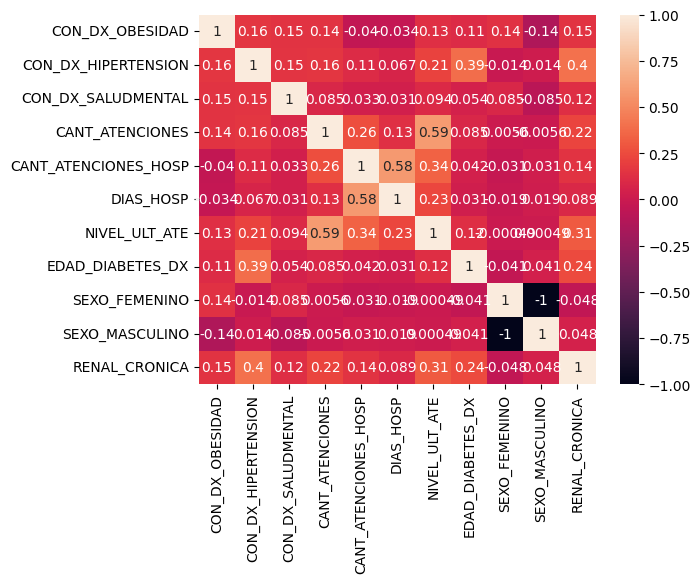

In [ ]:
sns.heatmap(train[['CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION', 'CON_DX_SALUDMENTAL',
       'CANT_ATENCIONES', 'CANT_ATENCIONES_HOSP', 'DIAS_HOSP', 'NIVEL_ULT_ATE',
        'EDAD_DIABETES_DX', 'SEXO_FEMENINO', 'SEXO_MASCULINO',
       'RENAL_CRONICA']].corr(), annot=True)

In [ ]:
#pip install pycaret

In [ ]:
from pycaret.classification import setup

xp = setup(data = train,
           test_data = test,
           target = 'RENAL_CRONICA',
           normalize = True,
           session_id = 42
           )

,Description,Value
0,Session id,42
1,Target,RENAL_CRONICA
2,Target type,Binary
3,Original data shape,"(34230, 11)"
4,Transformed data shape,"(34230, 11)"
5,Transformed train set shape,"(27384, 11)"
6,Transformed test set shape,"(6846, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [ ]:
from pycaret.classification import compare_models

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7105,0.7818,0.7788,0.6872,0.7301,0.4206,0.4246,0.7440
gbc,Gradient Boosting Classifier,0.7102,0.7840,0.7887,0.6837,0.7324,0.4199,0.4252,1.7000
ada,Ada Boost Classifier,0.7082,0.7817,0.7725,0.6865,0.7269,0.4159,0.4195,0.6270
xgboost,Extreme Gradient Boosting,0.7064,0.7786,0.7684,0.6857,0.7247,0.4124,0.4155,0.3550
ridge,Ridge Classifier,0.7027,0.7746,0.7513,0.6869,0.7176,0.4050,0.4070,0.0660
lda,Linear Discriminant Analysis,0.7027,0.7746,0.7513,0.6869,0.7176,0.4050,0.4070,0.1260
lr,Logistic Regression,0.7024,0.7750,0.7418,0.6898,0.7148,0.4045,0.4058,0.5510
svm,SVM - Linear Kernel,0.6988,0.7540,0.7637,0.6780,0.7183,0.3971,0.4004,0.2310
rf,Random Forest Classifier,0.6835,0.7394,0.7033,0.6788,0.6908,0.3669,0.3671,1.9770
et,Extra Trees Classifier,0.6764,0.7247,0.6647,0.6832,0.6738,0.3528,0.3530,1.8570


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

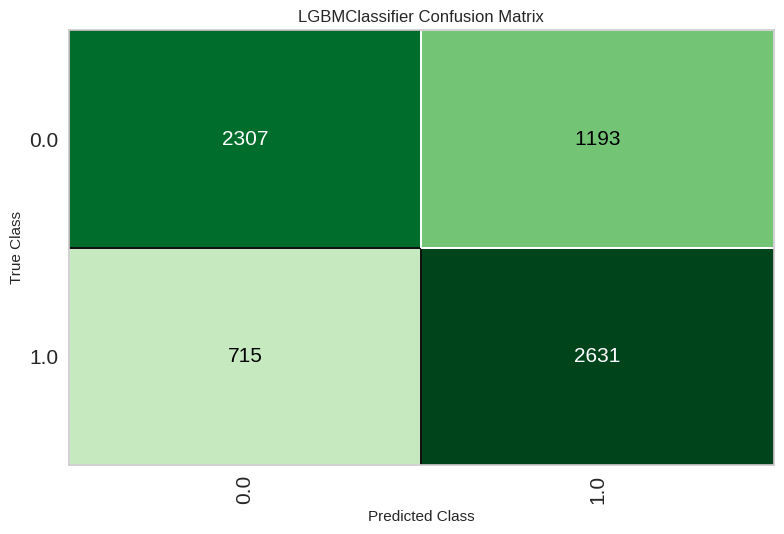

In [ ]:
from pycaret.classification import plot_model

plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
from pycaret.classification import plot_model, evaluate_model

evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
from pycaret.classification import tune_model

best_model_tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7021,0.7783,0.7458,0.6879,0.7157,0.4039,0.4053
1,0.7090,0.7818,0.7705,0.6881,0.7270,0.4176,0.4207
2,0.7094,0.7786,0.7930,0.6812,0.7329,0.4182,0.4240
3,0.7043,0.7728,0.7887,0.6766,0.7284,0.4080,0.4138
4,0.7133,0.7812,0.7863,0.6879,0.7338,0.4262,0.4306
5,0.7126,0.7853,0.7821,0.6886,0.7324,0.4246,0.4287
6,0.7169,0.7937,0.7872,0.6922,0.7367,0.4334,0.4376
7,0.7224,0.8009,0.8061,0.6925,0.7450,0.4443,0.4505
8,0.7140,0.7819,0.7952,0.6861,0.7366,0.4275,0.4331


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
best_model_tuned.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.05,
 'max_depth': -1,
 'min_child_samples': 86,
 'min_child_weight': 0.001,
 'min_split_gain': 0.9,
 'n_estimators': 130,
 'n_jobs': -1,
 'num_leaves': 40,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 2,
 'reg_lambda': 0.001,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'feature_fraction': 0.8,
 'bagging_freq': 5,
 'bagging_fraction': 0.6}

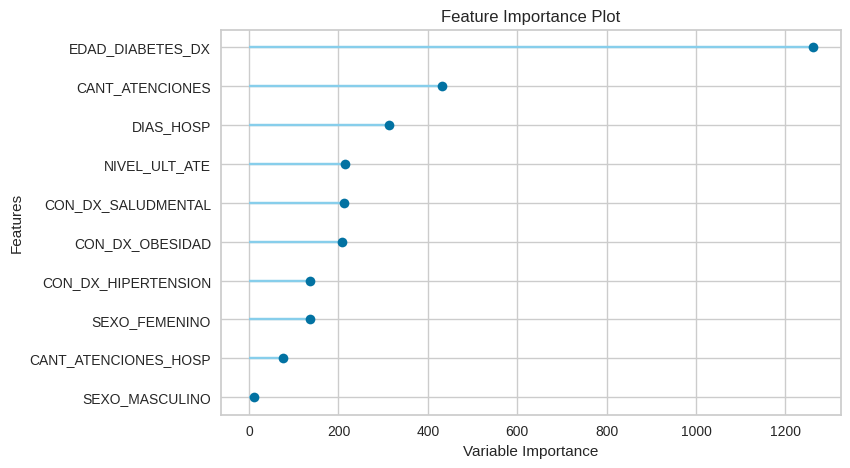

In [ ]:
plot_model(best_model, plot = 'feature')

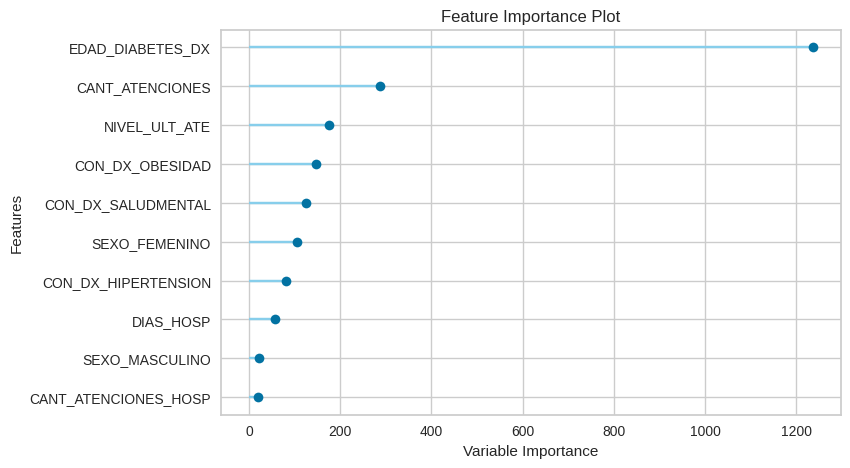

In [ ]:
plot_model(best_model_tuned, plot = 'feature')

In [ ]:
from pycaret.classification import save_model

# Guardar el modelo entrenado
save_model(best_model_tuned, 'modelo_renal_cronica')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CON_DX_OBESIDAD',
                                              'CON_DX_HIPERTENSION',
                                              'CON_DX_SALUDMENTAL',
                                              'CANT_ATENCIONES',
                                              'CANT_ATENCIONES_HOSP',
                                              'DIAS_HOSP', 'NIVEL_ULT_ATE',
                                              'EDAD_DIABETES_DX',
                                              'SEXO_FEMENINO',
                                              'SEXO_MASCULINO'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill...
                                 b

In [ ]:
'''
import gradio as gr
import pandas as pd
from pycaret.classification import load_model, predict_model

modelo_renal_cronica = load_model('modelo_renal_cronica')

# Función para predecir si el paciente tiene riesgo de enfermedad renal crónica
def predecir_renal(CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL,
                   CANT_ATENCIONES, CANT_ATENCIONES_HOSP, DIAS_HOSP,
                   NIVEL_ULT_ATE, EDAD_DIABETES_DX, SEXO_FEMENINO, SEXO_MASCULINO):

    # Validar entradas binarias
    for value in [CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL, SEXO_FEMENINO, SEXO_MASCULINO]:
        if value not in [0, 1]:
            return "Error: Los valores para Obesidad, Hipertensión, Salud Mental, Sexo Femenino y Sexo Masculino deben ser 0 o 1."

    # Crear un dataframe con los datos ingresados
    input_data = pd.DataFrame({
        'CON_DX_OBESIDAD': [CON_DX_OBESIDAD],
        'CON_DX_HIPERTENSION': [CON_DX_HIPERTENSION],
        'CON_DX_SALUDMENTAL': [CON_DX_SALUDMENTAL],
        'CANT_ATENCIONES': [CANT_ATENCIONES],
        'CANT_ATENCIONES_HOSP': [CANT_ATENCIONES_HOSP],
        'DIAS_HOSP': [DIAS_HOSP],
        'NIVEL_ULT_ATE': [NIVEL_ULT_ATE],
        'EDAD_DIABETES_DX': [EDAD_DIABETES_DX],
        'SEXO_FEMENINO': [SEXO_FEMENINO],
        'SEXO_MASCULINO': [SEXO_MASCULINO]
    })

    print("Datos ingresados:", input_data)

    try:
        prediction = predict_model(modelo_renal_cronica, data=input_data)

        print("Predicción del modelo:", prediction)
        resultado = prediction['prediction_label'][0]

        return "Riesgo de Enfermedad Renal Crónica" if resultado == 1 else "No tiene riesgo de Enfermedad Renal Crónica"
    except KeyError as e:
        return f"Error en la predicción: columna no encontrada - {str(e)}"
    except Exception as e:
        return f"Error en la predicción: {str(e)}"

# Crear la interfaz de Gradio
interfaz = gr.Interface(
    fn=predecir_renal,
    inputs = [
        gr.Number(label="Obesidad (1=Sí, 0=No)", value=0, precision=0, interactive=True),
        gr.Number(label="Hipertensión (1=Sí, 0=No)", value=0, precision=0, interactive=True),
        gr.Number(label="Salud Mental (1=Sí, 0=No)", value=0, precision=0, interactive=True),
        gr.Number(label="Cantidad de Atenciones", value=0, precision=0, interactive=True),
        gr.Number(label="Cantidad de Atenciones Hospitalarias", value=0, precision=0, interactive=True),
        gr.Number(label="Días Hospitalizado", value=0, precision=0, interactive=True),
        gr.Number(label="Nivel Última Atención", value=0, precision=0, interactive=True),
        gr.Number(label="Edad en el diagnóstico de Diabetes", value=0, precision=0, interactive=True),
        gr.Number(label="Sexo Femenino (1=Sí, 0=No)", value=0, precision=0, interactive=True),
        gr.Number(label="Sexo Masculino (1=Sí, 0=No)", value=0, precision=0, interactive=True)
    ],
    outputs="text",
    title="Predicción de Riesgo de Enfermedad Renal Crónica",
    description="Ingrese los datos del paciente para predecir el riesgo de enfermedad renal crónica."
)

# Lanzar la interfaz
interfaz.launch(share=True, debug=True)

'''

'\nimport gradio as gr\nimport pandas as pd\nfrom pycaret.classification import load_model, predict_model\n\nmodelo_renal_cronica = load_model(\'modelo_renal_cronica\')\n\n# Función para predecir si el paciente tiene riesgo de enfermedad renal crónica\ndef predecir_renal(CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL,\n                   CANT_ATENCIONES, CANT_ATENCIONES_HOSP, DIAS_HOSP,\n                   NIVEL_ULT_ATE, EDAD_DIABETES_DX, SEXO_FEMENINO, SEXO_MASCULINO):\n\n    # Validar entradas binarias\n    for value in [CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL, SEXO_FEMENINO, SEXO_MASCULINO]:\n        if value not in [0, 1]:\n            return "Error: Los valores para Obesidad, Hipertensión, Salud Mental, Sexo Femenino y Sexo Masculino deben ser 0 o 1."\n\n    # Crear un dataframe con los datos ingresados\n    input_data = pd.DataFrame({\n        \'CON_DX_OBESIDAD\': [CON_DX_OBESIDAD],\n        \'CON_DX_HIPERTENSION\': [CON_DX_HIPERTENSION],\n        \'CON

In [ ]:
'''
import gradio as gr
import pandas as pd
from pycaret.classification import load_model, predict_model

modelo_renal_cronica = load_model('modelo_renal_cronica')

# Función para predecir si el paciente tiene riesgo de enfermedad renal crónica
def predecir_renal(CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL,
                   CANT_ATENCIONES, CANT_ATENCIONES_HOSP, DIAS_HOSP,
                   NIVEL_ULT_ATE, EDAD_DIABETES_DX, SEXO):

    # Validar entradas binarias
    for value in [CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL]:
        if value not in [0, 1]:
            return "Error: Los valores para Obesidad, Hipertensión y Salud Mental deben ser 0 o 1."

    # Validar sexo
    if SEXO not in ['Masculino', 'Femenino']:
        return "Error: El sexo debe ser 'Masculino' o 'Femenino'."

    # Crear un dataframe con los datos ingresados
    input_data = pd.DataFrame({
        'CON_DX_OBESIDAD': [CON_DX_OBESIDAD],
        'CON_DX_HIPERTENSION': [CON_DX_HIPERTENSION],
        'CON_DX_SALUDMENTAL': [CON_DX_SALUDMENTAL],
        'CANT_ATENCIONES': [CANT_ATENCIONES],
        'CANT_ATENCIONES_HOSP': [CANT_ATENCIONES_HOSP],
        'DIAS_HOSP': [DIAS_HOSP],
        'NIVEL_ULT_ATE': [NIVEL_ULT_ATE],
        'EDAD_DIABETES_DX': [EDAD_DIABETES_DX],
        'SEXO_FEMENINO': [1 if SEXO == 'Femenino' else 0],
        'SEXO_MASCULINO': [1 if SEXO == 'Masculino' else 0]
    })

    print("Datos ingresados:", input_data)

    # Hacer predicción
    try:
        prediction = predict_model(modelo_renal_cronica, data=input_data)

        print("Predicción del modelo:", prediction)  # Verifica la predicción
        resultado = prediction['prediction_label'][0]  # Cambia 'Label' a 'prediction_label'

        return "Riesgo de Enfermedad Renal Crónica" if resultado == 1 else "No tiene riesgo de Enfermedad Renal Crónica"
    except KeyError as e:
        return f"Error en la predicción: columna no encontrada - {str(e)}"
    except Exception as e:
        return f"Error en la predicción: {str(e)}"

# Crear la interfaz de Gradio
interfaz = gr.Interface(
    fn=predecir_renal,
    inputs = [
        gr.Radio(label="DX Obesidad (1=Sí, 0=No)", choices=[0, 1], value=0),
        gr.Radio(label="DX Hipertensión (1=Sí, 0=No)", choices=[0, 1], value=0),
        gr.Radio(label="DX Salud Mental (1=Sí, 0=No)", choices=[0, 1], value=0),
        gr.Number(label="Cantidad de Atenciones", value=0, precision=0, interactive=True),
        gr.Number(label="Cantidad de Atenciones Hospitalarias", value=0, precision=0, interactive=True),
        gr.Number(label="Días Hospitalizado", value=0, precision=0, interactive=True),
        gr.Number(label="Nivel Última Atención", value=0, precision=0, interactive=True),
        gr.Number(label="Edad en el diagnóstico de Diabetes", value=0, precision=0, interactive=True),
        gr.Dropdown(label="Sexo", choices=["Masculino", "Femenino"], value="Masculino")
    ],
    outputs="text",
    title="Predicción de Riesgo de Enfermedad Renal Crónica",
    description="Ingrese los datos del paciente para predecir el riesgo de enfermedad renal crónica."
)

# Lanzar la interfaz
interfaz.launch(share=True, debug=True)
'''

'\nimport gradio as gr\nimport pandas as pd\nfrom pycaret.classification import load_model, predict_model\n\nmodelo_renal_cronica = load_model(\'modelo_renal_cronica\')\n\n# Función para predecir si el paciente tiene riesgo de enfermedad renal crónica\ndef predecir_renal(CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL,\n                   CANT_ATENCIONES, CANT_ATENCIONES_HOSP, DIAS_HOSP,\n                   NIVEL_ULT_ATE, EDAD_DIABETES_DX, SEXO):\n\n    # Validar entradas binarias\n    for value in [CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL]:\n        if value not in [0, 1]:\n            return "Error: Los valores para Obesidad, Hipertensión y Salud Mental deben ser 0 o 1."\n\n    # Validar sexo\n    if SEXO not in [\'Masculino\', \'Femenino\']:\n        return "Error: El sexo debe ser \'Masculino\' o \'Femenino\'."\n\n    # Crear un dataframe con los datos ingresados\n    input_data = pd.DataFrame({\n        \'CON_DX_OBESIDAD\': [CON_DX_OBESIDAD],\n        \'CO

In [ ]:
'''
import gradio as gr
import pandas as pd
from pycaret.classification import load_model, predict_model

modelo_renal_cronica = load_model('modelo_renal_cronica')

def predecir_renal(CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL,
                   CANT_ATENCIONES, CANT_ATENCIONES_HOSP, DIAS_HOSP,
                   NIVEL_ULT_ATE, EDAD_DIABETES_DX, SEXO):

    for value in [CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL]:
        if value not in [0, 1]:
            return "Error: Los valores para Obesidad, Hipertensión y Salud Mental deben ser 0 o 1."

    if SEXO not in ['Masculino', 'Femenino']:
        return "Error: El sexo debe ser 'Masculino' o 'Femenino'."

    input_data = pd.DataFrame({
        'CON_DX_OBESIDAD': [CON_DX_OBESIDAD],
        'CON_DX_HIPERTENSION': [CON_DX_HIPERTENSION],
        'CON_DX_SALUDMENTAL': [CON_DX_SALUDMENTAL],
        'CANT_ATENCIONES': [CANT_ATENCIONES],
        'CANT_ATENCIONES_HOSP': [CANT_ATENCIONES_HOSP],
        'DIAS_HOSP': [DIAS_HOSP],
        'NIVEL_ULT_ATE': [NIVEL_ULT_ATE],
        'EDAD_DIABETES_DX': [EDAD_DIABETES_DX],
        'SEXO_FEMENINO': [1 if SEXO == 'Femenino' else 0],
        'SEXO_MASCULINO': [1 if SEXO == 'Masculino' else 0]
    })

    print("Datos ingresados:", input_data)

    try:
        prediction = predict_model(modelo_renal_cronica, data=input_data)
        print("Predicción del modelo:", prediction)
        resultado = prediction['prediction_label'][0]

        return "Riesgo de Enfermedad Renal Crónica" if resultado == 1 else "No tiene riesgo de Enfermedad Renal Crónica"
    except KeyError as e:
        return f"Error en la predicción: columna no encontrada - {str(e)}"
    except Exception as e:
        return f"Error en la predicción: {str(e)}"

logo_html = """
<div style='background-color: #08659f; padding: 10px; text-align: center; border-radius: 15px; display: flex; justify-content: space-between;'>
    <img src='https://www.contadoresyempresas.com.pe/wp-content/uploads/2021/07/sis.png' alt='Logo SIS' style='height: 80px; filter: invert(1) brightness(100);'/>
    <img src='https://www.minsa.gob.pe/reunis/images/logo_minsa.png' alt='Logo MINSA' style='height: 80px; display: none; margin-left: 10px;' class='minsa-logo'/>
</div>
<style>
@media (min-width: 768px) {
    .minsa-logo {
        display: block; /* Mostrar en escritorio */
    }
}
</style>
"""

interfaz = gr.Interface(
    fn=predecir_renal,
    inputs=[
        gr.Radio(label="DX Obesidad (1=Sí, 0=No)", choices=[0, 1], value=0),
        gr.Radio(label="DX Hipertensión (1=Sí, 0=No)", choices=[0, 1], value=0),
        gr.Radio(label="DX Salud Mental (1=Sí, 0=No)", choices=[0, 1], value=0),
        gr.Number(label="Cantidad de Atenciones", value=0, precision=0, interactive=True),
        gr.Number(label="Cantidad de Atenciones Hospitalarias", value=0, precision=0, interactive=True),
        gr.Number(label="Días Hospitalizado", value=0, precision=0, interactive=True),
        gr.Number(label="Nivel Última Atención", value=0, precision=0, interactive=True),
        gr.Number(label="Edad en el diagnóstico de Diabetes", value=0, precision=0, interactive=True),
        gr.Dropdown(label="Sexo", choices=["Masculino", "Femenino"], value="Masculino")
    ],
    outputs=gr.Textbox(label="Resultado"),
    title="Predicción de Riesgo de Enfermedad Renal Crónica",
    description="Ingrese los datos del paciente para predecir el riesgo de enfermedad renal crónica.",
)

with gr.Blocks() as demo:
    gr.HTML(logo_html)
    interfaz.render()

demo.launch(share=True, debug=True)


'''


'\nimport gradio as gr\nimport pandas as pd\nfrom pycaret.classification import load_model, predict_model\n\nmodelo_renal_cronica = load_model(\'modelo_renal_cronica\')\n\ndef predecir_renal(CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL,\n                   CANT_ATENCIONES, CANT_ATENCIONES_HOSP, DIAS_HOSP,\n                   NIVEL_ULT_ATE, EDAD_DIABETES_DX, SEXO):\n\n    for value in [CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL]:\n        if value not in [0, 1]:\n            return "Error: Los valores para Obesidad, Hipertensión y Salud Mental deben ser 0 o 1."\n\n    if SEXO not in [\'Masculino\', \'Femenino\']:\n        return "Error: El sexo debe ser \'Masculino\' o \'Femenino\'."\n\n    input_data = pd.DataFrame({\n        \'CON_DX_OBESIDAD\': [CON_DX_OBESIDAD],\n        \'CON_DX_HIPERTENSION\': [CON_DX_HIPERTENSION],\n        \'CON_DX_SALUDMENTAL\': [CON_DX_SALUDMENTAL],\n        \'CANT_ATENCIONES\': [CANT_ATENCIONES],\n        \'CANT_ATENCIONES_HOSP\': [C

In [ ]:
import gradio as gr
import pandas as pd
from pycaret.classification import load_model, predict_model

modelo_renal_cronica = load_model('modelo_renal_cronica')

def predecir_renal(CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL,
                   CANT_ATENCIONES, CANT_ATENCIONES_HOSP, DIAS_HOSP,
                   NIVEL_ULT_ATE, EDAD_DIABETES_DX, SEXO):

    for value in [CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL]:
        if value not in [0, 1]:
            return "Error: Los valores para Obesidad, Hipertensión y Salud Mental deben ser 0 o 1."

    if SEXO not in ['Masculino', 'Femenino']:
        return "Error: El sexo debe ser 'Masculino' o 'Femenino'."

    input_data = pd.DataFrame({
        'CON_DX_OBESIDAD': [CON_DX_OBESIDAD],
        'CON_DX_HIPERTENSION': [CON_DX_HIPERTENSION],
        'CON_DX_SALUDMENTAL': [CON_DX_SALUDMENTAL],
        'CANT_ATENCIONES': [CANT_ATENCIONES],
        'CANT_ATENCIONES_HOSP': [CANT_ATENCIONES_HOSP],
        'DIAS_HOSP': [DIAS_HOSP],
        'NIVEL_ULT_ATE': [NIVEL_ULT_ATE],
        'EDAD_DIABETES_DX': [EDAD_DIABETES_DX],
        'SEXO_FEMENINO': [1 if SEXO == 'Femenino' else 0],
        'SEXO_MASCULINO': [1 if SEXO == 'Masculino' else 0]
    })

    print("Datos ingresados:", input_data)

    try:
        prediction = predict_model(modelo_renal_cronica, data=input_data)
        print("Predicción del modelo:", prediction)
        resultado = prediction['prediction_label'][0]

        return "Riesgo de Enfermedad Renal Crónica" if resultado == 1 else "No tiene riesgo de Enfermedad Renal Crónica"
    except KeyError as e:
        return f"Error en la predicción: columna no encontrada - {str(e)}"
    except Exception as e:
        return f"Error en la predicción: {str(e)}"

logo_html = """
<div style='background-color: #08659f; padding: 10px; text-align: center; border-radius: 15px; display: flex; justify-content: space-between;'>
    <img src='https://www.contadoresyempresas.com.pe/wp-content/uploads/2021/07/sis.png' alt='Logo SIS' style='height: 80px; filter: invert(1) brightness(100);'/>
    <img src='https://www.minsa.gob.pe/reunis/images/logo_minsa.png' alt='Logo MINSA' style='height: 80px; display: none; margin-left: 10px;' class='minsa-logo'/>
</div>
<style>
@media (min-width: 768px) {
    .minsa-logo {
        display: block; /* Mostrar en escritorio */
    }
}
</style>
"""

interfaz = gr.Interface(
    fn=predecir_renal,
    inputs=[
        gr.Radio(label="DX Obesidad (1=Sí, 0=No)", choices=[0, 1], value=0),
        gr.Radio(label="DX Hipertensión (1=Sí, 0=No)", choices=[0, 1], value=0),
        gr.Radio(label="DX Salud Mental (1=Sí, 0=No)", choices=[0, 1], value=0),
        gr.Number(label="Cantidad de Atenciones", value=0, precision=0, interactive=True),
        gr.Number(label="Cantidad de Atenciones Hospitalarias", value=0, precision=0, interactive=True),
        gr.Number(label="Días Hospitalizado", value=0, precision=0, interactive=True),
        gr.Number(label="Nivel Hospital Última Atención (1 - 2 - 3)", value=0, precision=0, interactive=True),
        gr.Number(label="Edad en el diagnóstico de Diabetes", value=0, precision=0, interactive=True),
        gr.Dropdown(label="Sexo", choices=["Masculino", "Femenino"], value="Masculino")
    ],
    outputs=gr.Textbox(label="Resultado"),
    title="Predicción de Riesgo de Enfermedad Renal Crónica",
    description="Ingrese los datos del paciente para predecir el riesgo de enfermedad renal crónica.",
)

with gr.Blocks() as demo:
    gr.HTML(logo_html)
    interfaz.render()
    gr.HTML("<a href='https://minsadigital.minsa.gob.pe/#/login' target='_blank'><button style='width: 50%; padding: 10px; background-color: #08659f; color: white; border: none; border-radius: 5px; cursor: pointer;'>Reservar cita médica</button></a>")

demo.launch(share=True, debug=True)

Transformation Pipeline and Model Successfully Loaded
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://cafce4926324633883.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    1                   1                0   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              0                 0   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              0               1  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    1                   1                0   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              0                 0   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              0               1                 1            0.5436  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    0                   0                0   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              0                 0   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              0               1  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    0                   0                0   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              0                 0   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              0               1                 0            0.9581  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    1                   0                2   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              0                32   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              1               0  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    1                   0                2   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              0                32   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              1               0                 0            0.5896  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    0                   0                0   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              2                34   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              0               1  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    0                   0                0   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              2                34   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              0               1                 0            0.6234  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    1                   1                0   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              0                 0   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              0               1  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    1                   1                0   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              0                 0   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              0               1                 1            0.5436  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    0                   0               20   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     1         50              2                10   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              0               1  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    0                   0               20   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     1         50              2                10   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              0               1                 1             0.539  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    1                   0                5   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     2          6              2                27   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              1               0  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    1                   0                5   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     2          6              2                27   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              1               0                 1            0.8569  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    1                   0                5   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     2          6              2                15   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              1               0  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    1                   0                5   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     2          6              2                15   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              1               0                 1            0.8358  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    1                   0                5   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     2          6              2                 1   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              1               0  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    1                   0                5   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     2          6              2                 1   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              1               0                 1            0.8358  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    1                   0                1   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     1          0              3                 1   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              1               0  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    1                   0                1   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     1          0              3                 1   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              1               0                 1            0.7192  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    1                   0                1   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              2                 1   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              1               0  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    1                   0                1   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              2                 1   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              1               0                 1            0.6413  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    0                   0                1   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              2                 1   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              1               0  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    0                   0                1   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              2                 1   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              1               0                 0            0.8421  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    1                   0                1   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              2                 1   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              1               0  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                0                    1                   0                1   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     0          0              2                 1   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              1               0                 1            0.6413  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    1                   1                2   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     1         12              1                23   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              0               1  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    1                   1                2   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     1         12              1                23   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              0               1                 1            0.6758  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    1                   1                2   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     1          1              1                23   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              0               1  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    1                   1                2   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     1          1              1                23   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              0               1                 1              0.59  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    1                   0                2   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     1          1              1                23   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              0               1  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    1                   0                2   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     1          1              1                23   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              0               1                 0            0.5302  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    0                   1                2   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     1          1              1                23   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              0               1  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    0                   1                2   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     1          1              1                23   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              0               1                 0            0.7945  
Datos ingresados:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    1                   0                2   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     1          0              1                23   

   SEXO_FEMENINO  SEXO_MASCULINO  
0              0               1  


Predicción del modelo:    CON_DX_OBESIDAD  CON_DX_HIPERTENSION  CON_DX_SALUDMENTAL  CANT_ATENCIONES  \
0                1                    1                   0                2   

   CANT_ATENCIONES_HOSP  DIAS_HOSP  NIVEL_ULT_ATE  EDAD_DIABETES_DX  \
0                     1          0              1                23   

   SEXO_FEMENINO  SEXO_MASCULINO  prediction_label  prediction_score  
0              0               1                 0            0.5392  


In [ ]:
'''
import gradio as gr
import pandas as pd
from pycaret.classification import load_model, predict_model

modelo_renal_cronica = load_model('modelo_renal_cronica')

def predecir_renal(CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL,
                   CANT_ATENCIONES, CANT_ATENCIONES_HOSP, DIAS_HOSP,
                   NIVEL_ULT_ATE, EDAD_DIABETES_DX, SEXO):

    for value in [CON_DX_OBESIDAD, CON_DX_HIPERTENSION, CON_DX_SALUDMENTAL]:
        if value not in [0, 1]:
            return "Error: Los valores para Obesidad, Hipertensión y Salud Mental deben ser 0 o 1.", None

    if SEXO not in ['Masculino', 'Femenino']:
        return "Error: El sexo debe ser 'Masculino' o 'Femenino'.", None

    input_data = pd.DataFrame({
        'CON_DX_OBESIDAD': [CON_DX_OBESIDAD],
        'CON_DX_HIPERTENSION': [CON_DX_HIPERTENSION],
        'CON_DX_SALUDMENTAL': [CON_DX_SALUDMENTAL],
        'CANT_ATENCIONES': [CANT_ATENCIONES],
        'CANT_ATENCIONES_HOSP': [CANT_ATENCIONES_HOSP],
        'DIAS_HOSP': [DIAS_HOSP],
        'NIVEL_ULT_ATE': [NIVEL_ULT_ATE],
        'EDAD_DIABETES_DX': [EDAD_DIABETES_DX],
        'SEXO_FEMENINO': [1 if SEXO == 'Femenino' else 0],
        'SEXO_MASCULINO': [1 if SEXO == 'Masculino' else 0]
    })

    try:
        prediction = predict_model(modelo_renal_cronica, data=input_data)
        resultado = prediction['prediction_label'][0]

        # Devolvemos también el valor numérico de la predicción (1 o 0)
        if resultado == 1:
            return "Riesgo de Enfermedad Renal Crónica", 1
        else:
            return "No tiene riesgo de Enfermedad Renal Crónica", 0
    except KeyError as e:
        return f"Error en la predicción: columna no encontrada - {str(e)}", None
    except Exception as e:
        return f"Error en la predicción: {str(e)}", None

logo_html = """
<div style='background-color: #08659f; padding: 10px; text-align: center; border-radius: 15px; display: flex; justify-content: space-between;'>
    <img src='https://www.contadoresyempresas.com.pe/wp-content/uploads/2021/07/sis.png' alt='Logo SIS' style='height: 80px; filter: invert(1) brightness(100);'/>
    <img src='https://www.minsa.gob.pe/reunis/images/logo_minsa.png' alt='Logo MINSA' style='height: 80px; display: none; margin-left: 10px;' class='minsa-logo'/>
</div>
<style>
@media (min-width: 768px) {
    .minsa-logo {
        display: block; /* Mostrar en escritorio */
    }
}
</style>
"""

with gr.Blocks() as demo:
    gr.HTML(logo_html)

    # Creamos un contenedor que contendrá la interfaz principal
    with gr.Row():
        resultado_texto = gr.Textbox(label="Resultado")
        boton_web = gr.HTML("<a href='https://minsadigital.minsa.gob.pe/#/login' target='_blank'><button style='width: 100%; padding: 10px; background-color: #08659f; color: white; border: none; border-radius: 5px; cursor: pointer;'>Visitar sitio web del MINSA</button></a>")
        boton_web.visible = False  # Inicialmente, ocultamos el botón

    def actualizar_interfaz(resultado, valor_prediccion):
        # Actualiza la interfaz, mostrando el botón solo si hay riesgo de enfermedad renal crónica
        if valor_prediccion == 1:
            return resultado, gr.update(visible=True)  # Mostrar el botón
        else:
            return resultado, gr.update(visible=False)  # Ocultar el botón

    # La interfaz para predecir y actualizar la visibilidad del botón
    interfaz = gr.Interface(
        fn=predecir_renal,
        inputs=[
            gr.Radio(label="DX Obesidad (1=Sí, 0=No)", choices=[0, 1], value=0),
            gr.Radio(label="DX Hipertensión (1=Sí, 0=No)", choices=[0, 1], value=0),
            gr.Radio(label="DX Salud Mental (1=Sí, 0=No)", choices=[0, 1], value=0),
            gr.Number(label="Cantidad de Atenciones", value=0, precision=0, interactive=True),
            gr.Number(label="Cantidad de Atenciones Hospitalarias", value=0, precision=0, interactive=True),
            gr.Number(label="Días Hospitalizado", value=0, precision=0, interactive=True),
            gr.Number(label="Nivel Última Atención", value=0, precision=0, interactive=True),
            gr.Number(label="Edad en el diagnóstico de Diabetes", value=0, precision=0, interactive=True),
            gr.Dropdown(label="Sexo", choices=["Masculino", "Femenino"], value="Masculino")
        ],
        outputs=[resultado_texto, boton_web],
        title="Predicción de Riesgo de Enfermedad Renal Crónica",
        description="Ingrese los datos del paciente para predecir el riesgo de enfermedad renal crónica.",
        live=False
    )

    interfaz.launch(share=True, debug=True)
    '''
